# Flight Price Prediction

# Problem Statement :
    
Airlines implement dynamic pricing for their tickets, and base their pricing decisions on demand estimation models. The reason for such a complicated system is that each flight only has a set number of seats to sell, so airlines have to regulate demand. In the case where demand is expected to exceed capacity, the airline may increase prices, to decrease the rate at which seats fill. On the other hand, a seat that goes unsold represents a loss of revenue and selling that seat for any price above the service cost for a single passenger would have been a more preferable scenario.

Anyone who has booked a flight ticket knows how unexpectedly the prices vary. The cheapest available ticket on a given flight gets more and less expensive over time. This usually happens as an attempt to maximize revenue based on.

1. Time of purchase patterns(making sure last-minute purchases are expensive)


2. Keeping the flight as full as they want it (raising prices on a flight which is filling up in order to reduce sales and hold back inventory for those expensive last-minute expensive purchases)

So, you have to work on a project where you collect data of flight fares with other features and work to make a model to predict fares of flights. This project contains three phase -



# 1.Data Collection:
    
    I have done web scraping to collect the data of flight ticket prices from the well known website https://www.yatra.com/ where I found more features of flights compared to other websites and I fetch data for different locations. As per the requirement we need to build the model to predict the prices of different flight tickets.


# 2. Data Analysis:
    
    After cleaning the data, we have to do some analysis on the data.
    
    - Do airfares change freauently? Do they move in small increments or in large jumps?
    - Do they tend to go up or down over time?
    - What is the best time to buy so that the consumer can save the most by taking the least risk?
    - Does price increase as we get near to departure date?
    - Is Indigo cheaper than Jet Airways?
    - Are morning flights expensive?

# 3. Model Building:
    
    After collecting the data, we need to build a machine learning model. Before model building do all data pre-processing steps. Try different models with different hyper parameters and select the bestmodel.
    
    Follow the complete life cycle of data science. Include all the steps like
    
    - Data Cleaning
    - Exploratory Data Analysis
    - Data Pre-processing
    - Model Building
    - Model Evaluation
    - Selecting the best model

# Importing necessary libraries/dependencies.

In [ ]:
# preprocessing
import numpy as np
import pandas as pd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy as stats
from scipy.stats import zscore 

# evaluation metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn import metrics

# ml algorithms
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor

from sklearn.model_selection import GridSearchCV
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')


# Importing collected dataset

In [ ]:
# reading excel file
df = pd.read_excel("/content/Flight_Price.xlsx")
df

,Unnamed: 0,Airline,Departure_time,Time_of_arrival,Duration,Source,Destination,Meal_availability,Number_of_stops,Price
0,0,Go First,08:45,10:55,2h 10m,New Delhi,Mumbai,eCash 250,Non Stop,"5,954"
1,1,Go First,22:30,00:40,2h 10m,New Delhi,Mumbai,None,Non Stop,"5,954"
2,2,Go First,14:20,16:35,2h 15m,New Delhi,Mumbai,eCash 250,Non Stop,"5,954"
3,3,Go First,10:20,12:40,2h 20m,New Delhi,Mumbai,eCash 250,Non Stop,"5,954"
4,4,Go First,08:25,14:00,5h 35m,New Delhi,Mumbai,eCash 250,1 Stop,"5,954"
...,...,...,...,...,...,...,...,...,...,...
3350,3350,Air India,11:05,21:35,10h 30m,Lucknow,Hyderabad,Free Meal,1 Stop,"11,349"
3351,3351,Air India,08:55,12:25,27h 30m,Lucknow,Hyderabad,Free Meal,2 Stop(s),"12,360"
3352,3352,Air India,15:25,12:15,20h 50m,Lucknow,Hyderabad,No Meal Fare,2 Stop(s),"12,387"
3353,3353,Air India,14:05,20:05,6h 00m,Lucknow,Goa,eCash 250,1 Stop,"7,463"


Here I am importing the collected dataset which is in excel format and storing it into dataframe(df) for further usage. Here we can observe first 5 and last 5 rows of the dataset. There are 3355 rows and 10 columns in th edataframe. The dataset contains both numerical and categorical data. There are bothe dependent and independent variables present in the dataframe. We have our target variable "Price" which stores the price of the flight tickets and it is continuous in nature which makes this problem to be a "Regression Problem"

# Data Cleaning

In [ ]:
# dropping unwanted column
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head()

,Airline,Departure_time,Time_of_arrival,Duration,Source,Destination,Meal_availability,Number_of_stops,Price
0,Go First,08:45,10:55,2h 10m,New Delhi,Mumbai,eCash 250,Non Stop,"5,954"
1,Go First,22:30,00:40,2h 10m,New Delhi,Mumbai,None,Non Stop,"5,954"
2,Go First,14:20,16:35,2h 15m,New Delhi,Mumbai,eCash 250,Non Stop,"5,954"
3,Go First,10:20,12:40,2h 20m,New Delhi,Mumbai,eCash 250,Non Stop,"5,954"
4,Go First,08:25,14:00,5h 35m,New Delhi,Mumbai,eCash 250,1 Stop,"5,954"


Removed unwanted column "Unnamed: 0" from the dataset since it was only storing the index data and was not a worthy feature column for prediction. We can observe first 5 rows of the dataset.

In [ ]:
#  checking the dimensions of the dataset
print("There are {} rows and {} columns in our dataframe".format(df.shape[0], df.shape[1]))

There are 3355 rows and 9 columns in our dataframe


The dataset contains 3355 rows and 9 columns. Out of 9 columns 8 are independent variables and remaining on is our target variable "Price" which is dependent variable.

In [ ]:
# checking the column names in the dataset
print("Columns present in our dataset: \n",df.columns)

Columns present in our dataset: 
 Index(['Airline', 'Departure_time', 'Time_of_arrival', 'Duration', 'Source',
       'Destination', 'Meal_availability', 'Number_of_stops', 'Price'],
      dtype='object')


These are the columns present in our dataset.

In [ ]:
# checking number of unique values in each column of dataset
df.nunique().to_frame("No of Unique Values")

,No of Unique Values
Airline,7
Departure_time,225
Time_of_arrival,235
Duration,404
Source,9
Destination,9
Meal_availability,4
Number_of_stops,5
Price,819


Above are the number of unique values present in each of the columns present in the dataset.

In [ ]:
# to get good overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3355 entries, 0 to 3354
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            3355 non-null   object
 1   Departure_time     3355 non-null   object
 2   Time_of_arrival    3355 non-null   object
 3   Duration           3355 non-null   object
 4   Source             3355 non-null   object
 5   Destination        3355 non-null   object
 6   Meal_availability  3355 non-null   object
 7   Number_of_stops    3355 non-null   object
 8   Price              3355 non-null   object
dtypes: object(9)
memory usage: 236.0+ KB


- This info() method gives the information about the dataset which includes indexing type, column type, no-null values and memory usage.
- The dataset contains object data. We will encode the object datatypes using appropriate encoding techniques before building machine learning models.
- Since counts of all the columns are same, which means there are no null values present in the dataset.

In [ ]:
# checking null values in the dataset
df.isnull().sum()

Airline              0
Departure_time       0
Time_of_arrival      0
Duration             0
Source               0
Destination          0
Meal_availability    0
Number_of_stops      0
Price                0
dtype: int64

As we can see there are no missing values in any of the columns.

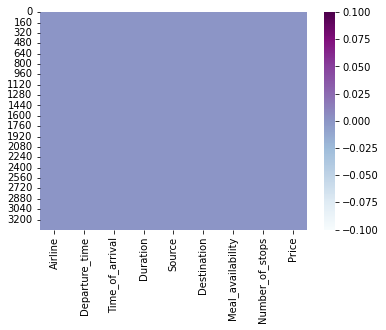

In [ ]:
# let's visualize the null values clearly
sns.heatmap(df.isnull(),cmap="BuPu")
plt.show()

Here we can clearly observe there are no missing values.

# Value Count Function

Let's check the list of value counts in each columns to find if there are any unexpected or corrupted entries present in the dataset.

In [ ]:
# checking the value counts of each columns
for i in df.columns:
    print(df[i].value_counts())
    print('*'*80)

Air India    1297
IndiGo        810
Vistara       808
Go First      211
SpiceJet      157
Air Asia       70
StarAir         2
Name: Airline, dtype: int64
********************************************************************************
14:00    87
09:55    69
10:45    66
13:20    64
20:30    56
         ..
19:15     1
18:25     1
23:10     1
03:45     1
18:20     1
Name: Departure_time, Length: 225, dtype: int64
********************************************************************************
19:40    79
20:45    75
20:00    66
14:00    62
23:35    58
         ..
21:10     1
06:35     1
11:05     1
02:55     1
02:00     1
Name: Time_of_arrival, Length: 235, dtype: int64
********************************************************************************
2h 10m     38
2h 15m     31
2h 45m     30
1h 10m     30
8h 20m     24
           ..
38h 15m     1
29h 15m     1
30h 55m     1
8h 11m      1
3h 11m      1
Name: Duration, Length: 404, dtype: int64
**********************************************

These are the value counts of the columns present in the dataset.

# Feature Engineering

The columns Time_of_arrival and Departure_Time showing object data type which means python is not able to understand the type of data in this column due to some string values or categorical signs like ":" Which we can observe in th evalue count function. Therefor, we have to convert this datatype into timestamp (datatime) to use them properly for prediction. 

In [ ]:
# converting columns from object type to Datetime type
df["Departure_time"] = pd.to_datetime(df["Departure_time"])
df["Time_of_arrival"] = pd.to_datetime(df["Time_of_arrival"])

In [ ]:
# checking the data types of all columns again
df.dtypes

Airline                      object
Departure_time       datetime64[ns]
Time_of_arrival      datetime64[ns]
Duration                     object
Source                       object
Destination                  object
Meal_availability            object
Number_of_stops              object
Price                        object
dtype: object

# Duration

The column Duration has values in terms of minutes and hours, Duration means the time taken by the plane to reach the destination and it is the difference between the arrival time and Departure time. Let's extract proper duration time in terms of float data type from Time_of_arrival and Departure_time columns

In [ ]:
# extracting duration column using Time_of_arrival and Departure_Time
Difference = (df["Time_of_arrival"]-df["Departure_time"])
Diff_list = list()
for i in range(len(Difference)):
    duration = Difference.iloc[i].seconds/3600     # converting difference into seconds and dividing it by 3600 (1hr=3600 seconds)
    Diff_list.append(duration)
df["Duration"] = Diff_list

# Departure_time

Let's extract values from Departure_time. Departure time means when a flight leaves the airport and this column contains hours and minutes so we will extract hours and minutes from Departure_time.

In [ ]:
# departure time means the time when the journey starts from the source.

# extracting hours from departure_time column
df["Departure_Hour"] = pd.to_datetime(df["Departure_time"]).dt.hour

# extracting minutes from Dep_Time column
df["Departure_Min"] = pd.to_datetime(df["Departure_time"]).dt.minute

Now we have extracted hour and minute from Departure_time column. Let's drop Departure_time column as it is of no use now.

In [ ]:
# dropping departure_time column
df.drop("Departure_time",axis=1,inplace=True)

# Time_of_arrival

Similarly we can extract hours and minutes from Time_of_arrival column and dropping Time_of_arrival column.

In [ ]:
# Arrival time is the time of arrival at the destination.

# extracting hour from time_of_arrival column
df["Arrival_Hour"] = pd.to_datetime(df["Time_of_arrival"]).dt.hour

# extracting minutes from arrival_time column
df["Arrival_Min"] = pd.to_datetime(df["Time_of_arrival"]).dt.minute

# dropping arrival_time column
df.drop("Time_of_arrival",axis=1,inplace=True)

Now we have extracted required data from the columns

# Price

The target column should be in continuous numeric data type but it is appearing as object data type due to some categorical sign ",". Let's replace this sign by empty space and convert the type into float.

In [ ]:
# let's replace "," sign by empty space
df['Price'] = df['Price'].str.replace(',','')

# let's convert data type of Price column to float
df['Price'] = df['Price'].astype('float')

# Meal_availability

From the value count function of meal_availability we can observe "eCash 250" entry which does not belongs to meals so we can replace it as 'None'. Also, the other two entries "No meal fare" and "Free meal" belongs to same category that is they give same meaning so we can group them as well. We can also drop this column, but there are only few features in the dataset so, trying to retain the columns for prediction.

In [ ]:
# replacing "eCash250" by "None"
df['Meal_availability'] = df['Meal_availability'].replace('eCash 250','None')


# grouping the entries with same meaning
df['Meal_availability'] = df['Meal_availability'].replace('No Meal Fare','Free Meal')

# Number_of_stops

From the value count function of Number_of_stops we can observe the categorical values, let's replace them with numeric  data.

In [ ]:
# replacing categorical values with numeric data
df.Number_of_stops.replace({"Non Stop": 0,"1 Stop": 1,"2 Stop(s)": 2,"3 Stop(s)" :3,"4 Stop(s)": 4},inplace = True)

Now we have successfully cleaned our data, let's have a look at dataframe.

In [ ]:
# checking dataset again
df

,Airline,Duration,Source,Destination,Meal_availability,Number_of_stops,Price,Departure_Hour,Departure_Min,Arrival_Hour,Arrival_Min
0,Go First,2.166667,New Delhi,Mumbai,None,0,5954.0,8,45,10,55
1,Go First,2.166667,New Delhi,Mumbai,None,0,5954.0,22,30,0,40
2,Go First,2.250000,New Delhi,Mumbai,None,0,5954.0,14,20,16,35
3,Go First,2.333333,New Delhi,Mumbai,None,0,5954.0,10,20,12,40
4,Go First,5.583333,New Delhi,Mumbai,None,1,5954.0,8,25,14,0
...,...,...,...,...,...,...,...,...,...,...,...
3350,Air India,10.500000,Lucknow,Hyderabad,Free Meal,1,11349.0,11,5,21,35
3351,Air India,3.500000,Lucknow,Hyderabad,Free Meal,2,12360.0,8,55,12,25
3352,Air India,20.833333,Lucknow,Hyderabad,Free Meal,2,12387.0,15,25,12,15
3353,Air India,6.000000,Lucknow,Goa,None,1,7463.0,14,5,20,5


In [ ]:
# checking shape of data after cleaning
df.shape

(3355, 11)

Now the dataset contains 3355 rows and 11 columns.

In [ ]:
# let's check the data types of the columns
df.dtypes

Airline               object
Duration             float64
Source                object
Destination           object
Meal_availability     object
Number_of_stops        int64
Price                float64
Departure_Hour         int64
Departure_Min          int64
Arrival_Hour           int64
Arrival_Min            int64
dtype: object

The dataframe has 3 types of data that is object , integer and float data types. We will encode the object data types before building the ML model.

In [ ]:
# checking the uniqueness of target column
df["Price"].unique()

array([ 5954.,  5955.,  5956.,  6060.,  6375.,  7163.,  7468.,  8055.,
        8160.,  8895.,  9000.,  9105.,  9158.,  9590.,  9840.,  9945.,
        9988., 10365., 10470., 10680., 11295., 11977., 12675., 15720.,
        7423.,  7424.,  7425.,  7426.,  7740.,  9735.,  9788.,  7635.,
        8071.,  8123., 11520., 11625., 11629., 11940., 12936., 13115.,
       14028., 14616., 15553., 16035.,  8790.,  9148.,  9170.,  9210.,
       10260., 10474., 10828., 10920., 10969., 11231., 11310., 12071.,
       13188., 15498., 16245., 17016.,  7845.,  8769.,  9362.,  9368.,
        9463., 10050., 10155., 11805., 12044., 12203., 12360., 12696.,
       13724., 15231., 16034.,  5953.,  8396.,  9053.,  9538.,  9732.,
        3434.,  3435., 10544., 14460.,  4274.,  4275.,  9709., 11384.,
       13725., 14778., 16329., 17505., 18240.,  5939.,  5942.,  5943.,
        5102.,  5103.,  5104.,  5208.,  6258.,  8043.,  8096.,  8148.,
        8936.,  9201.,  8069.,  8568.,  8673.,  8831.,  9093.,  9251.,
      

These are the unique values present in the target column.

In [ ]:
# checking whether the target contains any space
df.loc[df['Price']==" "]

,Airline,Duration,Source,Destination,Meal_availability,Number_of_stops,Price,Departure_Hour,Departure_Min,Arrival_Hour,Arrival_Min


There is not any empty space in any of the columns.

# Description of Dataset

In [ ]:
# statistical summary of dataset
df.describe()

,Duration,Number_of_stops,Price,Departure_Hour,Departure_Min,Arrival_Hour,Arrival_Min
count,3355.000000,3355.000000,3355.000000,3355.000000,3355.000000,3355.000000,3355.000000
mean,9.881396,1.244709,9954.239046,12.974963,26.414903,15.298361,27.936513
std,6.772514,0.737062,3440.176400,5.272421,17.599080,5.540988,18.161532
min,0.000000,0.000000,3361.000000,0.000000,0.000000,0.000000,0.000000
25%,3.833333,1.000000,7425.000000,9.000000,15.000000,11.000000,15.000000
50%,8.833333,1.000000,9776.000000,13.000000,30.000000,16.000000,30.000000
75%,14.875000,2.000000,12389.000000,17.000000,40.000000,20.000000,45.000000
max,23.916667,4.000000,25024.000000,23.000000,59.000000,23.000000,59.000000


This gives the statistical information of the dataset. The summary of this dataset looks perfect since there is no negative/invalid values present. It gives the summary of numerical data.

From the above description we can observe the following things:
    
- The counts of every column is same which means there are no missing values present in the dataset.
- The mean value is greater than the median(50%)  in the columns Duration, Number_of_stops and Price so we can say these columns are skewed to right.
- The median(50%) is bit greater than mean in Departure_Hour, Departure_Min, Arrival_Hour and Arrival_Min which mrans these columns are skewed to left.
- From the description we can say the minimum price of the flight ticket is Rs3361.00 and maximum price is Rs25024.00 also the mean is 9954.239046.
- In summarizing the data we can observe that there is huge difference in maximum and 75% percentile in the columns Price, Duration etc that means huge outliers present in those columns. These differences can also be seen in many other columns. So we need to remove outliers and skewness to get better model and prediction.

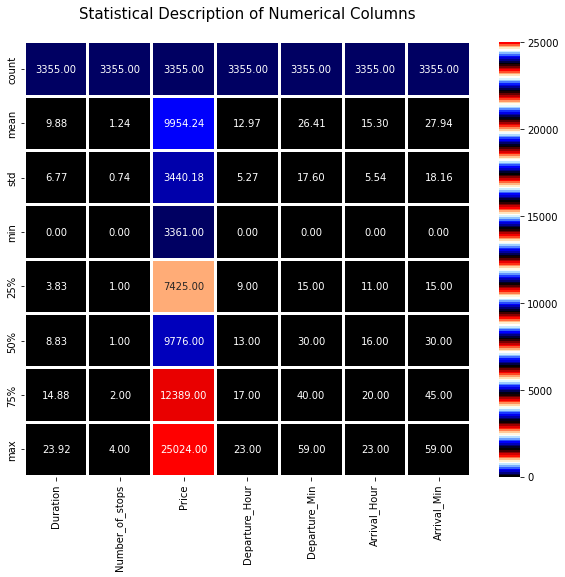

In [ ]:
# visualizing the statistical description of numeric datatype columns

plt.figure(figsize = (10,8))
sns.heatmap(round(df.describe()[0:],2), linewidth = 2, annot= True, fmt = ".2f", cmap="flag_r")
plt.title("Statistical Description of Numerical Columns\n",fontsize=15)

plt.show()

From the heat map we can observe the statistical summary of the numerical features present in the dataset.

# Separating numerical and categorical columns

In [ ]:
# separating numerical and categorical columns in the dataset

# checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print("Categorical columns present in the dataset are:\n",categorical_col)

# now checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print("\nNumerical columns present in the dataset are:\n",numerical_col)

Categorical columns present in the dataset are:
 ['Airline', 'Source', 'Destination', 'Meal_availability']

Numerical columns present in the dataset are:
 ['Duration', 'Number_of_stops', 'Price', 'Departure_Hour', 'Departure_Min', 'Arrival_Hour', 'Arrival_Min']


These are the object data type and numerical type columns present in the dataset "Number_of_stops" is categorical data since it is in integer type so its appearing as numeric data.

Now it's time to visualize the data.

# Exploratory Data Analysis (EDA)

# Data Visualization

# Univariate Analysis

# Plotting categorical Variables

Air India    1297
IndiGo        810
Vistara       808
Go First      211
SpiceJet      157
Air Asia       70
StarAir         2
Name: Airline, dtype: int64 

1    1832
2     936
0     432
3     148
4       7
Name: Number_of_stops, dtype: int64


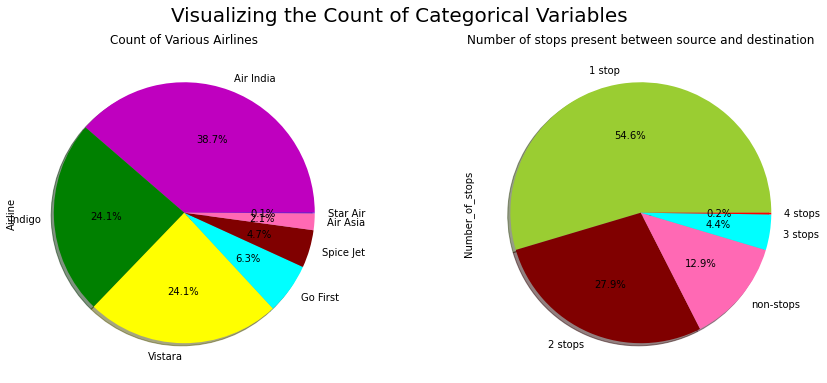

In [ ]:
# visualizing the count of categorical variables
plt.figure(figsize=(15,6))
plt.suptitle('Visualizing the Count of Categorical Variables',fontsize=20)

# visualizing the count of Airlines
plt.subplot(1,2,1)
print(df["Airline"].value_counts(),"\n")
plt.title('Count of Various Airlines')
labels = ['Air India', 'Indigo', 'Vistara', 'Go First', 'Spice Jet', 'Air Asia', 'Star Air']
colors = ["m","green","yellow","cyan","maroon","hotpink","blue"]
df['Airline'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,labels=labels,fontsize=10,colors=colors)

# visualizing the count of Number_of_stops
plt.subplot(1,2,2)
print(df['Number_of_stops'].value_counts())
plt.title('Number of stops present between source and destination')
labels = ['1 stop', '2 stops', 'non-stops', '3 stops', '4 stops']
colors = ["yellowgreen", "maroon", "hotpink", "cyan", "red"]
df['Number_of_stops'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,labels=labels,fontsize=10,colors=colors)
plt.show()

# Observations:
    
- Airline : From the pie plot we can infer that there are more number of flights of "Air India", "Indigo" and "Vistara" compared to others. Also, the count of "Star Air" flights are very less.

- Number_of_stops : From the above pie plot we can infer that 54.6% of the flights have only 1 stop during the journey and some of the flights (27.9%) have 2 stops where only few flights have 3, 4 stops.

Free Meal    2108
None         1247
Name: Meal_availability, dtype: int64


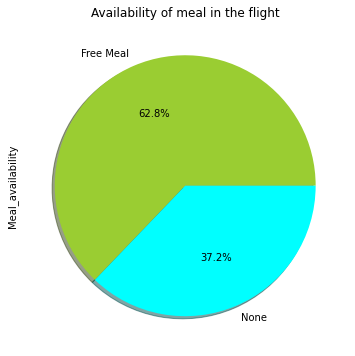

In [ ]:
# visualizing the availability of meal in the flight
plt.figure(figsize=(6,6))
print(df["Meal_availability"].value_counts())
plt.title('Availability of meal in the flight')
labels = ['Free Meal', 'None']
colors = ["yellowgreen","cyan"]
df['Meal_availability'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,labels=labels,fontsize=10,colors=colors)
plt.show()

Observations:
    
- Meal_availability: Most of the flights providing free meals and only few flights are not providing any meals.

New Delhi    481
Chennai      463
Mumbai       460
Bangalore    458
Hyderabad    421
Kolkata      375
Goa          297
Jaipur       226
Lucknow      174
Name: Source, dtype: int64 

Mumbai       517
Lucknow      448
Chennai      430
Hyderabad    409
Bangalore    380
Goa          348
Kolkata      322
New Delhi    279
Jaipur       222
Name: Destination, dtype: int64


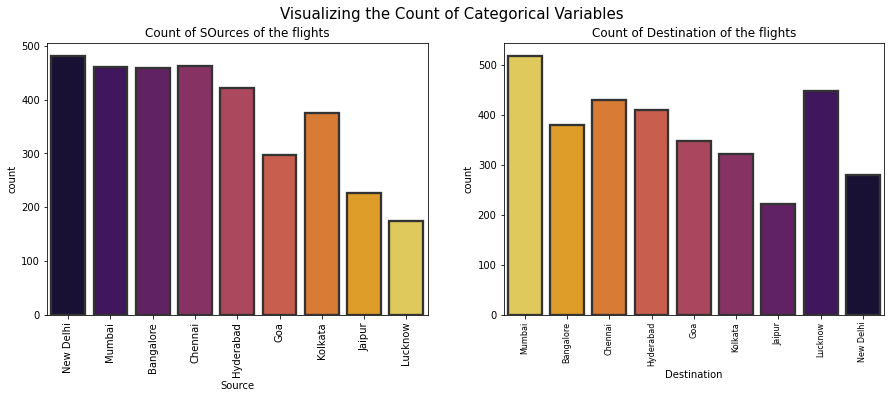

In [ ]:
# visualizing the ocunt of categoricla variables
plt.figure(figsize=(15,5))
plt.suptitle('Visualizing the Count of Categorical Variables',fontsize=15)

# visualizing the count of sources of the flights
plt.subplot(1,2,1)
print(df['Source'].value_counts(),"\n")
plt.title('Count of SOurces of the flights')
sns.countplot('Source', data=df, palette="inferno",linewidth=2.3, edgecolor=".2")
plt.xticks(rotation=90)

# visualizing the count of Destination of the flights
plt.subplot(1,2,2)
print(df['Destination'].value_counts())
plt.title('Count of Destination of the flights')
sns.countplot('Destination', data=df, palette="inferno_r",linewidth=2.3, edgecolor=".2")
plt.xticks(fontsize='8')
plt.xticks(rotation=90)
plt.show()

# Observations:
    
- Source: From the count plot we can observe more number of flights are from New Delhi, Chennai, Mumbai, Bangalore and Hyderabad. Only few flights are from Lucknow.
    
- Destination: More number of flights are heading towards Mumbai, Lucknow and Chennai. Only few flights are travelling to Jaipur.

# Distribution of Skewness

# Plotting Numerical Variables

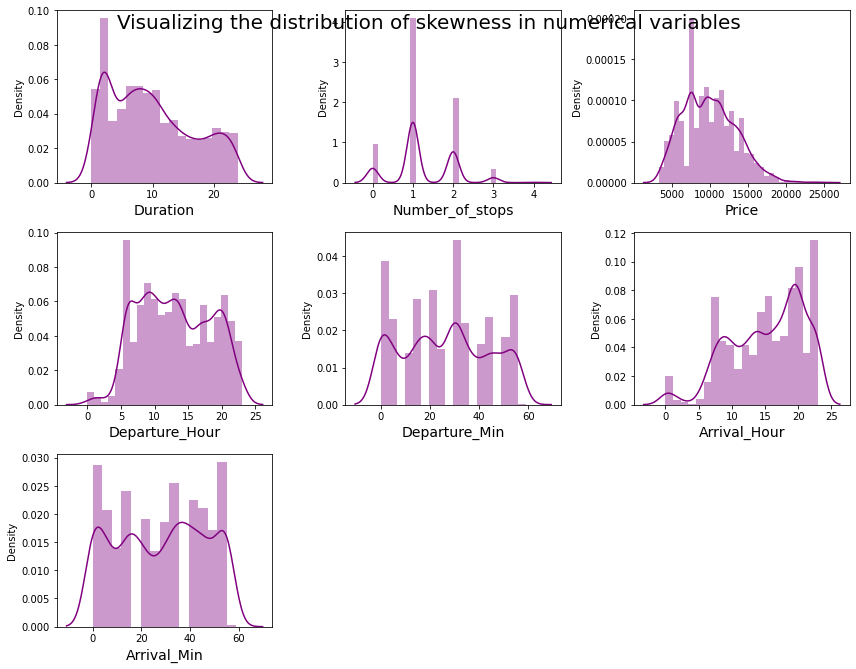

In [ ]:
# checking how the data has been distributed in each column

plt.figure(figsize=(12,12),facecolor='white')
plt.suptitle("Visualizing the distribution of skewness in numerical variables",fontsize=20)
plotnumber=1
for column in numerical_col:
    if plotnumber<=7:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[column], color="purple")
        plt.xlabel(column,fontsize=14)
    plotnumber+=1
plt.tight_layout()

# Observations:
    
Above plot shows how the data has been distributed in each of the columns.

- From the distribution plot we can observe the columns are somewhat distributed normally as they have no proper bell shape curve.
- The columns like 'Duration', 'Number_of_stops' and 'Price' are skewed to right as the mean value in these columns are much greater than the median(50%).
- Also the data in the column Arrival_Hour skewed to left since the mean values is less than the median.
- Since there is presence of skewness in the data, we need to remove skewness in the numerical columns to overcome with any kind of data business.

# Bivariate Analysis

# Visualizing Categorical Variables vs Targer Variable Price

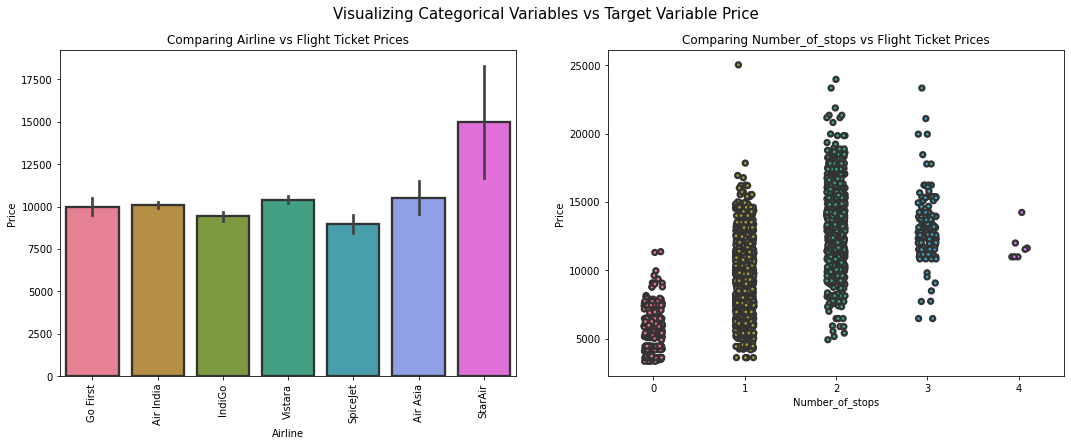

In [ ]:
plt.figure(figsize = (18,6))
plt.suptitle("Visualizing Categorical Variables vs Target Variable Price",fontsize=15)

# checking which Airline is expensive based on Price of tickets
plt.subplot(1,2,1)
plt.title("Comparing Airline vs Flight Ticket Prices")
sns.barplot(x= df['Airline'],y= df['Price'],palette = "husl",linewidth=2.3, edgecolor=".2")
plt.xticks(rotation = 90)

# checking flights which have meals availability are expensive or not?
plt.subplot(1,2,2)
plt.title("Comparing Number_of_stops vs Flight Ticket Prices")
sns.stripplot(x = df['Number_of_stops'],y= df['Price'],palette = "husl",linewidth=2.3, edgecolor=".2")
plt.show()

# Observations:
    
- Airline vs Price: From the bar plot we can notice "Star Air" and "Vistara" airlines have highest ticket prices compared to other airlines.
- Number_of_stops vs Price: From the strip plot we can notice the flights which have 1 and 2 stops between source and destination have highest ticket prices compared to others. The airlines which have 4 stops during the journey have very less ticket price. So we can say as the stops increases, ticket price decreases.

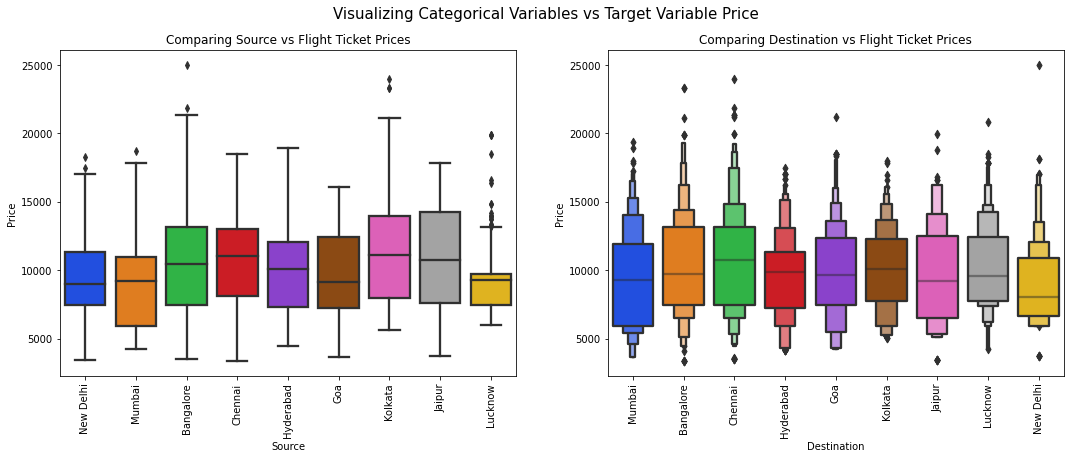

In [ ]:
plt.figure(figsize = (18,6))
plt.suptitle("Visualizing Categorical Variables vs Target Variable Price\n",fontsize=15)

# checking which source has highest ticket price
plt.subplot(1,2,1)
plt.title("Comparing Source vs Flight Ticket Prices")
sns.boxplot(x= df['Source'],y= df['Price'],palette = "bright",linewidth=2.3)
plt.xticks(rotation = 90)

# checking how prices changes in each destination
plt.subplot(1,2,2)
plt.title("Comparing Destination vs Flight Ticket Prices")
sns.boxenplot(x = df['Destination'],y= df['Price'],palette = "bright",linewidth=2.3)
plt.xticks(rotation = 90)
plt.show()

# Observations:
    
- Source vs Price: From the box plot we can observe the flights from Jaipur are having somewhat higher prices compared to other sources.
- Destination vs Price: From the boxen plot we can notice that the flights travelling to Banglore have higher flight ticket prices. 

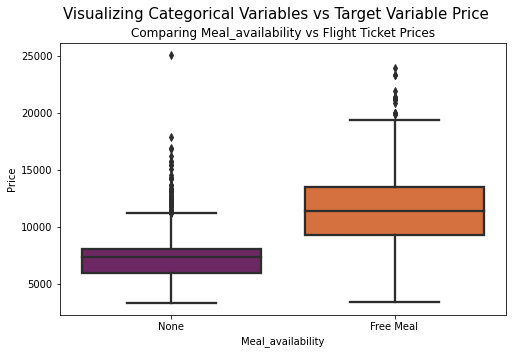

In [ ]:
plt.figure(figsize = (8,5))
plt.suptitle("Visualizing Categorical Variables vs Target Variable Price\n",fontsize=15)
plt.title("Comparing Meal_availability vs Flight Ticket Prices")
sns.boxplot(x= df['Meal_availability'],y= df['Price'],palette = "inferno",linewidth=2.3)
plt.show()

# Observations:
    
- Meal_availability vs Price:  The boxplot shows the flights having Free meal facility have high ticket prices.

# Visualizing Numerical Variables vs Target Variable Price

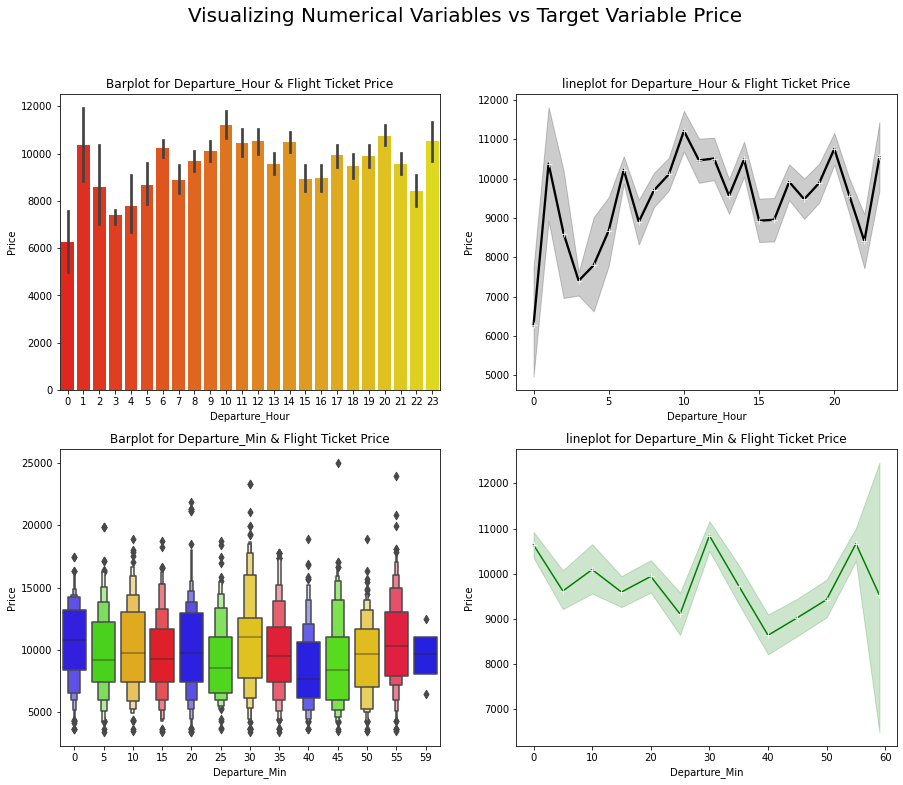

In [ ]:
plt.figure(figsize = (15,12))
plt.suptitle("Visualizing Numerical Variables vs Target Variable Price",fontsize=20)

plt.subplot(2,2,1)
plt.title("Barplot for Departure_Hour & Flight Ticket Price")
sns.barplot(x= df['Departure_Hour'],y= df['Price'],palette = "autumn",linewidth=2.3)

plt.subplot(2,2,2)
plt.title("lineplot for Departure_Hour & Flight Ticket Price")
sns.lineplot(x = df['Departure_Hour'],y= df['Price'],marker="+",color='k',linewidth=2.3)

plt.subplot(2,2,3)
plt.title("Barplot for Departure_Min & Flight Ticket Price")
sns.boxenplot(x='Departure_Min',y='Price',data=df,palette = "prism",color='k')

plt.subplot(2,2,4)
plt.title("lineplot for Departure_Min & Flight Ticket Price")
sns.lineplot(x='Departure_Min',y='Price',data=df,marker="+",color='g')

plt.show()

# Observations:
    
- Departure_Hour vs Price: From the bar plot and line plot we can see that there are some flights departing in the early morning 3 AM having most expensive ticket prices compared to late morning flights. We can also observe the flight ticket prices are higher during afternoon(may fluctuate) and it decreases in the evening.
- Departure_Min vs Price: The boxen plot and line plot gives there is no significant difference between price and departure min.

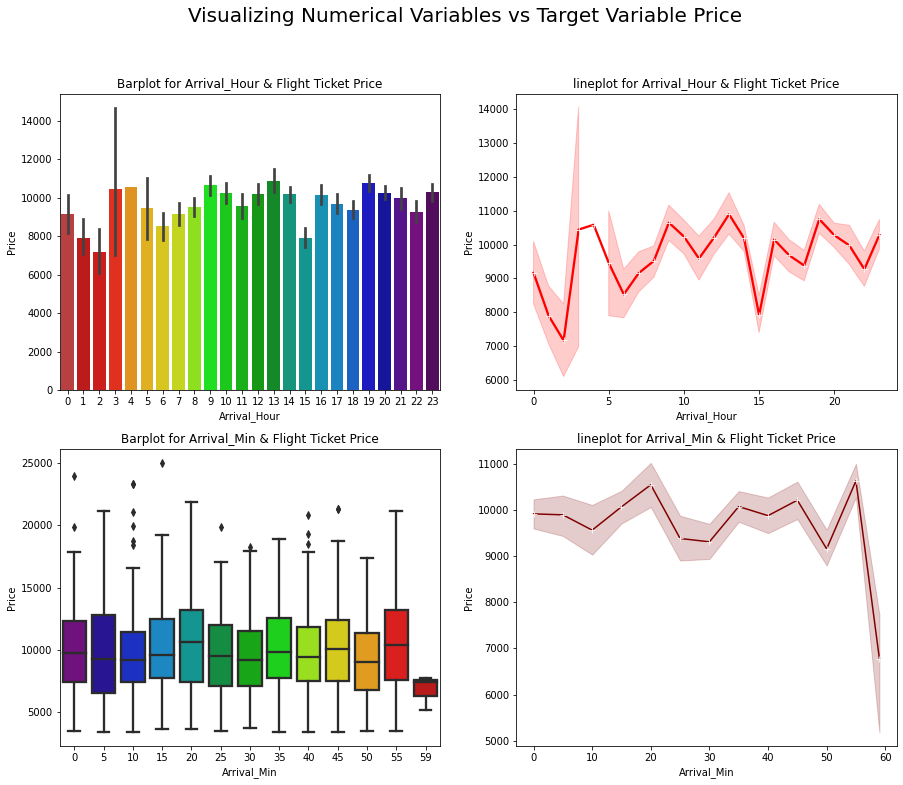

In [ ]:
plt.figure(figsize = (15,12))
plt.suptitle("Visualizing Numerical Variables vs Target Variable Price",fontsize=20)

plt.subplot(2,2,1)
plt.title("Barplot for Arrival_Hour & Flight Ticket Price")
sns.barplot(x= df['Arrival_Hour'],y= df['Price'],palette = "nipy_spectral_r",linewidth=2.3)

plt.subplot(2,2,2)
plt.title("lineplot for Arrival_Hour & Flight Ticket Price")
sns.lineplot(x = df['Arrival_Hour'],y= df['Price'],marker="+",color='r',linewidth=2.3)

plt.subplot(2,2,3)
plt.title("Barplot for Arrival_Min & Flight Ticket Price")
sns.boxplot(x='Arrival_Min',y='Price',data=df,palette = "nipy_spectral",linewidth=2.3)

plt.subplot(2,2,4)
plt.title("lineplot for Arrival_Min & Flight Ticket Price")
sns.lineplot(x='Arrival_Min',y='Price',data=df,marker="+",color='maroon')

plt.show()

# Observation:
    
- Arrival_Hour vs Price:  From the bar plot and line plot we can observe that very few flights are arriving in the early morning that is 0 to 6 AM they have very less ticket price. Also, the flights which are arriving in the aftermoon and evening have somewhat higher price. So, we can conclude this column has some positive correlation with price.
    
- Arrival_Min vs Price:  There is no significant difference between this feature and price. We can say flight ticket prices are not much dependent on the Arrival_Min.

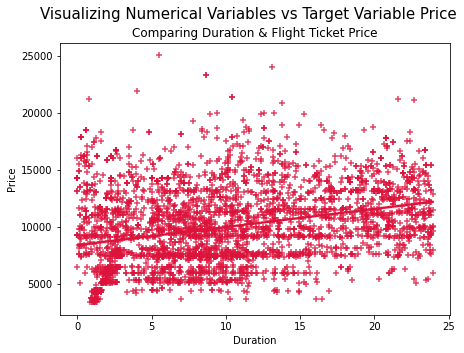

In [ ]:
# visualizing duration and price
plt.figure(figsize = (7,5))
plt.suptitle("Visualizing Numerical Variables vs Target Variable Price",fontsize=15)

plt.title("Comparing Duration & Flight Ticket Price")
sns.regplot(x= df['Duration'],y= df['Price'],marker="+",color='crimson')
plt.show()

# Observations:
    
- Duration vs Price:  From the reg plot we can observe some positive linear relation between Duration and Price. Flight having 1-12 hours of duration, they have ticket price of around 15000.
    
Till now we have checked the relation between the independent variables and dependent variable that is our target column "Price". Now let's check the relation between two independent variables and compare each of them with others.

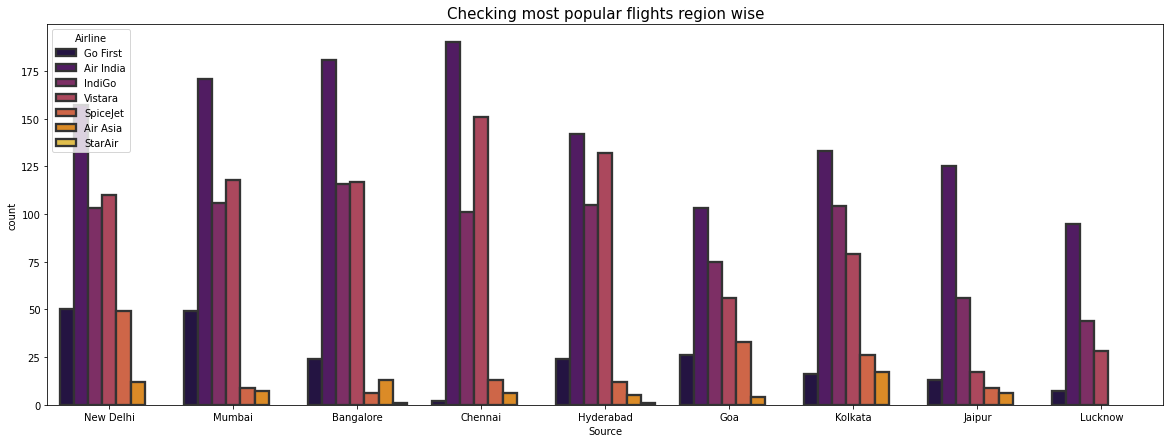

In [ ]:
# let's check the most popular flight region wise
plt.figure(figsize=(20,7))
sns.countplot(x = "Source", hue = "Airline", data = df, palette = "inferno",linewidth=2.3, edgecolor=".2")
plt.title("Checking most popular flights region wise",fontsize=15)
plt.show()

# Observations:
    
- Source vs Airline:  The plot showing the region wise count of airlines which tells us that Jaipur source is not having much flights and it has Air India flights in higher count compared to other sources. Other sources have Air India, IndiGo and Vistara flights with higher count.

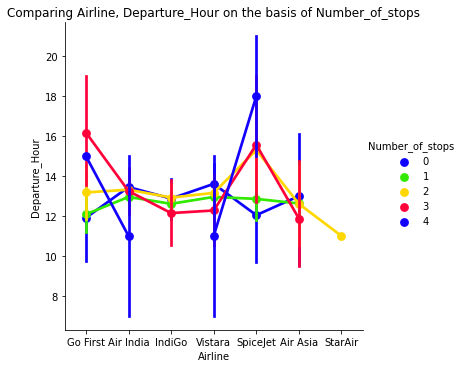

In [ ]:
# let's check the relation between independent variables
sns.factorplot(x= "Airline", y="Departure_Hour",hue="Number_of_stops",palette="prism", data=df)
plt.title("Comparing Airline, Departure_Hour on the basis of Number_of_stops")
plt.show()

# Observations:
    
- Above plot gives the relation between Airline and Departure hour based on Number of stops. Air India and Vistara flights are departing in the evening and they have less than 4 stops during the journey.

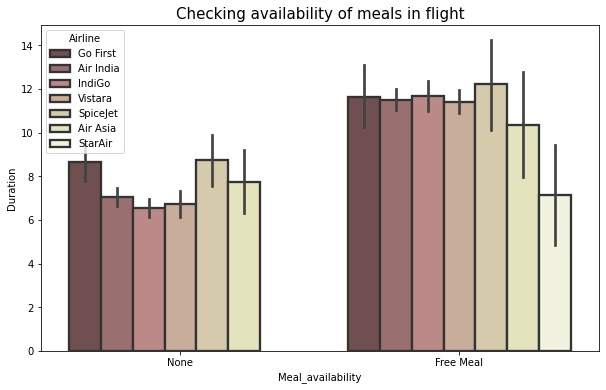

In [ ]:
# Let's check the most popular flight region wise
plt.figure(figsize=(10,6))
sns.barplot(x= "Meal_availability", y = "Duration",hue="Airline",data = df, palette = "pink",linewidth=2.3, edgecolor=".2")
plt.title("Checking availability of meals in flight",fontsize=15)
plt.show()

# Observations:
    
- All the airlines provides free meals during the journey having the duration below 11 hours.

# Multivariate Analysis

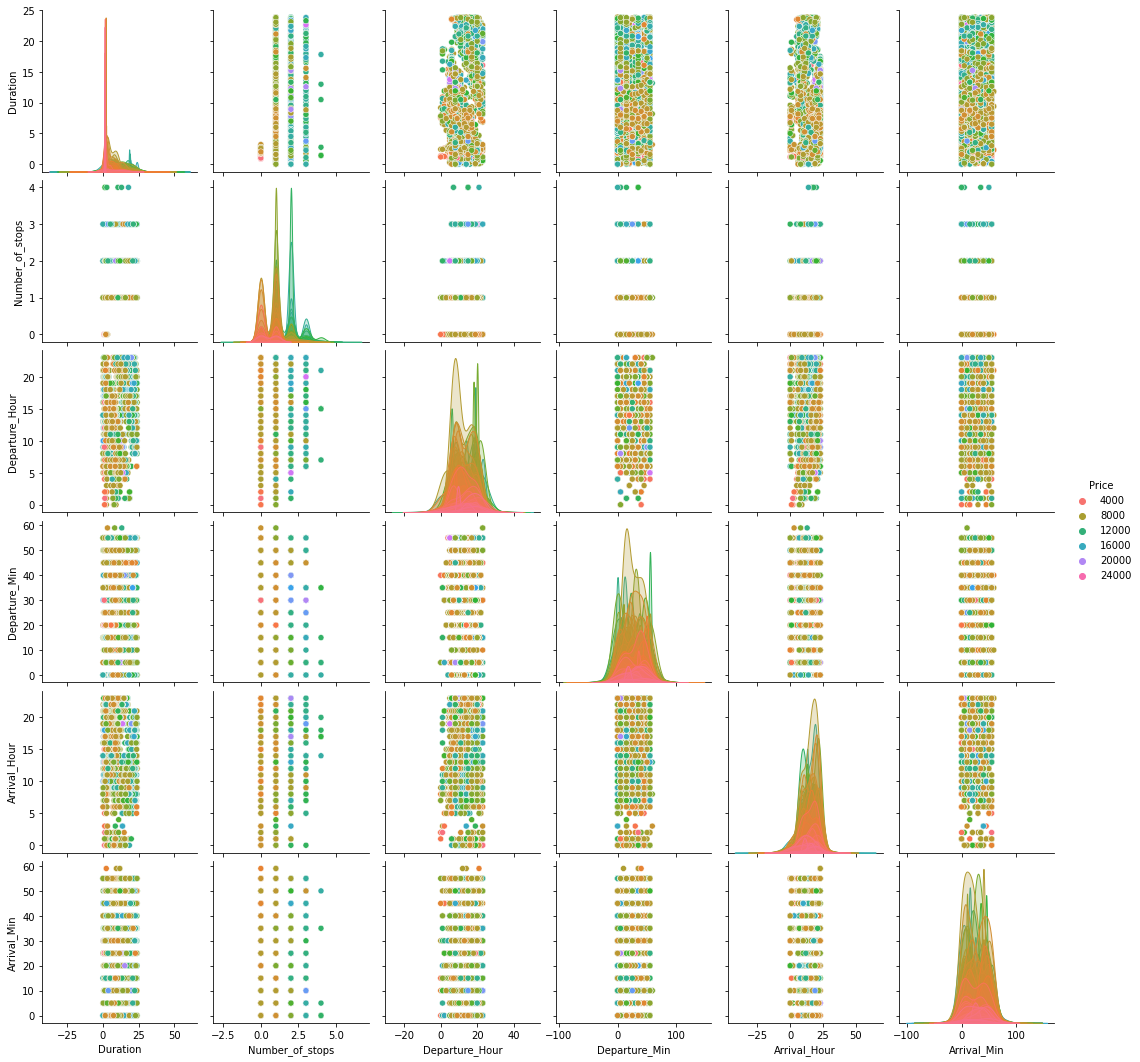

In [ ]:
sns.pairplot(df,hue="Price",palette="husl")
plt.show()

- This pair plot gives the pairwise relation between the columns which is plotted on the basis of target variable "Price". Here we can observe the relation between the features and label.
- Here we can observe the correlation between the features and on the diagonal we can notice the distribution plot which shows whether the column has skewness or not.

# EDA Conclusion:

# After cleaning the data, we have done the following analysis on the data.

1. Do airfares change frequently? Do they move in small increments or in large jumps?

- Flight ticket prices change during the morning and evening time of the day. From the distribution plots we came to know that the prices of the flight tickets are going up and down, they are not fixed at a time. Also, from this graph we found prices are increasing in large amounts.

2. Do they tend to go up or down over time?

- Some flights are departing in the early morning 3 AM having most expensive ticket prices compared to late morning flights. As the time goes the flight ticket fares increased and midnight flight fares are very less . Also from categorical and numericla plots we found that the prices are tending to go up as the time is approachin gfrom morning to evening.

3. What is the best tiem to buy so that the consumer can save the most by taking the least risk?

- From the categorical plots (bar and box) we came to know that early morning and late night flights are cheaper compared to working hours.

4. Does price increase as we get near to departure date?

- From the categorical plots we found that the flight ticket prices increases as the person get near to departure  time. That is last minute flights are very expensive.

5. Is Indigo cheaper than Jet Airways?

- From the bar plot we got to know that both Indigo and Spicejet airways almost having same ticket fares.

6. Are morning flights expensive?

- Not all flights are expensive during morning. Only few flights departing in the early morning 3 AM are expensive. Apart from this the flight ticket fares are less compared to other timing flight fares.

# Data Pre-Processing

# Identifying the outliers

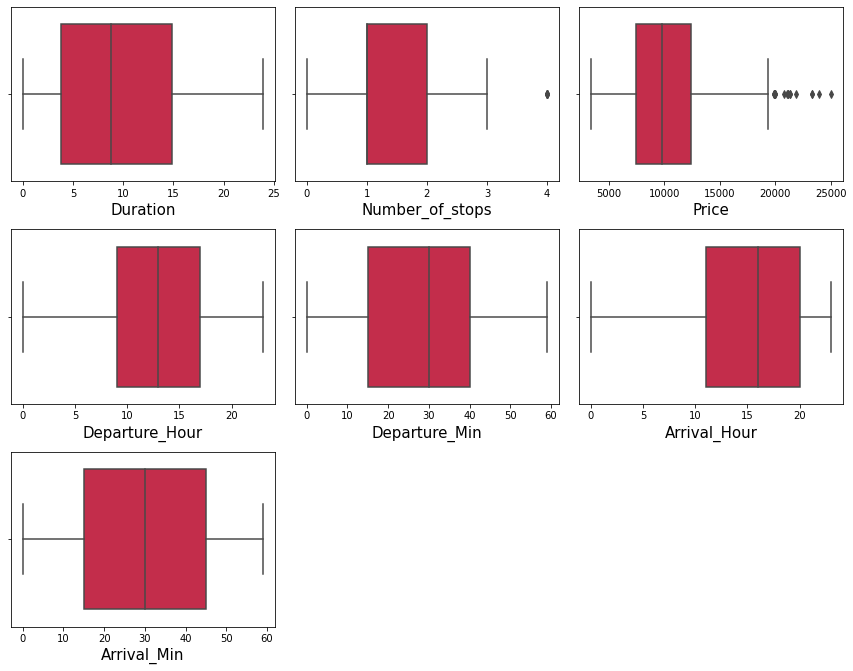

In [ ]:
# identifying the ourliers using boxplot

plt.figure(figsize=(12,12),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=7:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(df[column],color="crimson")
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

- So here we can see the outliers present in Number_of_stops and Price columns.
- Since Price is our target column and Number_of_stops is our categorical variable so no need to remove outliers in this columns. Finally there is no need to remove outliers in the dataset.

# Checking for skewness in the data

In [ ]:
# checking the skewness
df.skew()

Duration           0.443755
Number_of_stops    0.365212
Price              0.421232
Departure_Hour     0.085566
Departure_Min      0.055867
Arrival_Hour      -0.560681
Arrival_Min       -0.060716
dtype: float64

We can find the skewness in Duration and  Price column . Price is our target variable we should not loose any data so no need to remove skewness in this column so, let's remove skewness in duration column. 

# Removing skewness using square root transformation

In [ ]:
df["Duration"] = np.sqrt(df["Duration"])

In [ ]:
# again checking the skewness
df.skew()

Duration          -0.159483
Number_of_stops    0.365212
Price              0.421232
Departure_Hour     0.085566
Departure_Min      0.055867
Arrival_Hour      -0.560681
Arrival_Min       -0.060716
dtype: float64

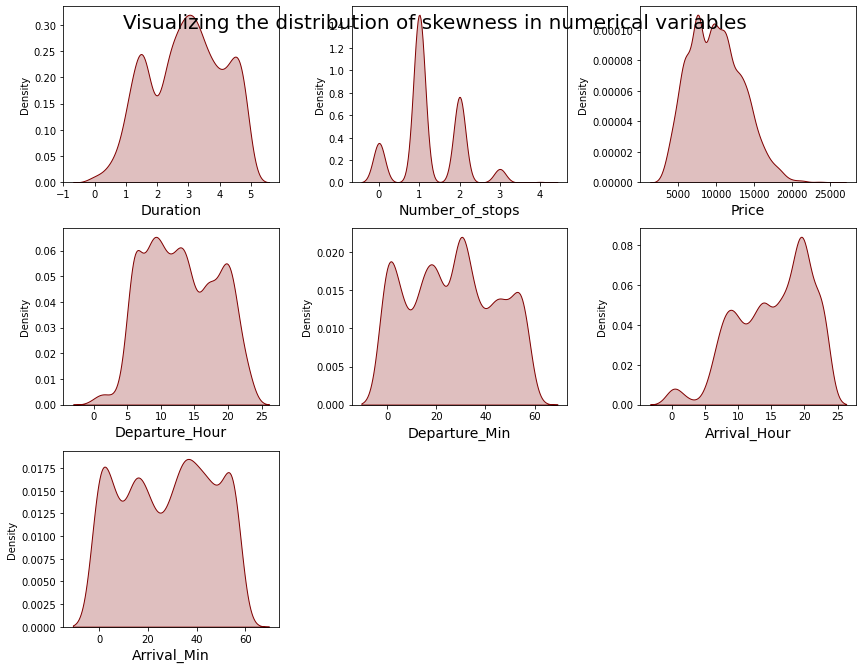

In [ ]:
# checking how the data has been distributed after removing skewness in the column

plt.figure(figsize=(12,12),facecolor='white')
plt.suptitle("Visualizing the distribution of skewness in numerical variables",fontsize=20)
plotnumber=1
for column in numerical_col:
    if plotnumber<=7:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[column],hist=False, color="maroon", kde_kws={"shade": True})
        plt.xlabel(column,fontsize=14)
    plotnumber+=1
plt.tight_layout()

# Encoding the categorical columns using Label Encoder Method

In [ ]:
# converting categorical data into numerical using Label Encoder method
from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()
df[categorical_col]= df[categorical_col].apply(LE.fit_transform)

In [ ]:
# displaying dataframe after encoding
df

,Airline,Duration,Source,Destination,Meal_availability,Number_of_stops,Price,Departure_Hour,Departure_Min,Arrival_Hour,Arrival_Min
0,2,1.471960,8,7,1,0,5954.0,8,45,10,55
1,2,1.471960,8,7,1,0,5954.0,22,30,0,40
2,2,1.500000,8,7,1,0,5954.0,14,20,16,35
3,2,1.527525,8,7,1,0,5954.0,10,20,12,40
4,2,2.362908,8,7,1,1,5954.0,8,25,14,0
...,...,...,...,...,...,...,...,...,...,...,...
3350,1,3.240370,6,3,0,1,11349.0,11,5,21,35
3351,1,1.870829,6,3,0,2,12360.0,8,55,12,25
3352,1,4.564355,6,3,0,2,12387.0,15,25,12,15
3353,1,2.449490,6,2,1,1,7463.0,14,5,20,5


Now we have converted the categorical columns into numerical columns using label encoding method.

# Correlation between the target variable and independent variables using HEAT map

In [ ]:
# checking the correlation between features and the target
cor = df.corr()
cor

,Airline,Duration,Source,Destination,Meal_availability,Number_of_stops,Price,Departure_Hour,Departure_Min,Arrival_Hour,Arrival_Min
Airline,1.000000,0.007574,-0.026177,-0.011213,-0.054041,0.018657,0.020008,0.000346,0.047211,-0.008199,0.006196
Duration,0.007574,1.000000,-0.058462,-0.013493,-0.256012,0.369525,0.298858,0.129849,-0.038682,-0.063379,0.014443
Source,-0.026177,-0.058462,1.000000,-0.221732,0.068394,-0.082505,-0.106519,0.070130,-0.032051,0.026543,0.007900
Destination,-0.011213,-0.013493,-0.221732,1.000000,0.007105,-0.034872,-0.081577,-0.010580,0.021982,-0.047486,-0.020601
Meal_availability,-0.054041,-0.256012,0.068394,0.007105,1.000000,-0.478018,-0.593488,-0.144703,0.075803,-0.027393,-0.059435
Number_of_stops,0.018657,0.369525,-0.082505,-0.034872,-0.478018,1.000000,0.662213,0.014543,-0.055293,0.076949,-0.019263
Price,0.020008,0.298858,-0.106519,-0.081577,-0.593488,0.662213,1.000000,0.002498,-0.035828,0.056985,0.021177
Departure_Hour,0.000346,0.129849,0.070130,-0.010580,-0.144703,0.014543,0.002498,1.000000,-0.081651,0.010349,-0.004706
Departure_Min,0.047211,-0.038682,-0.032051,0.021982,0.075803,-0.055293,-0.035828,-0.081651,1.000000,0.054452,0.053026
Arrival_Hour,-0.008199,-0.063379,0.026543,-0.047486,-0.027393,0.076949,0.056985,0.010349,0.054452,1.000000,-0.029712


This gives the correlation between the dependent and independent variables. We can visualize this by plotting heat map.

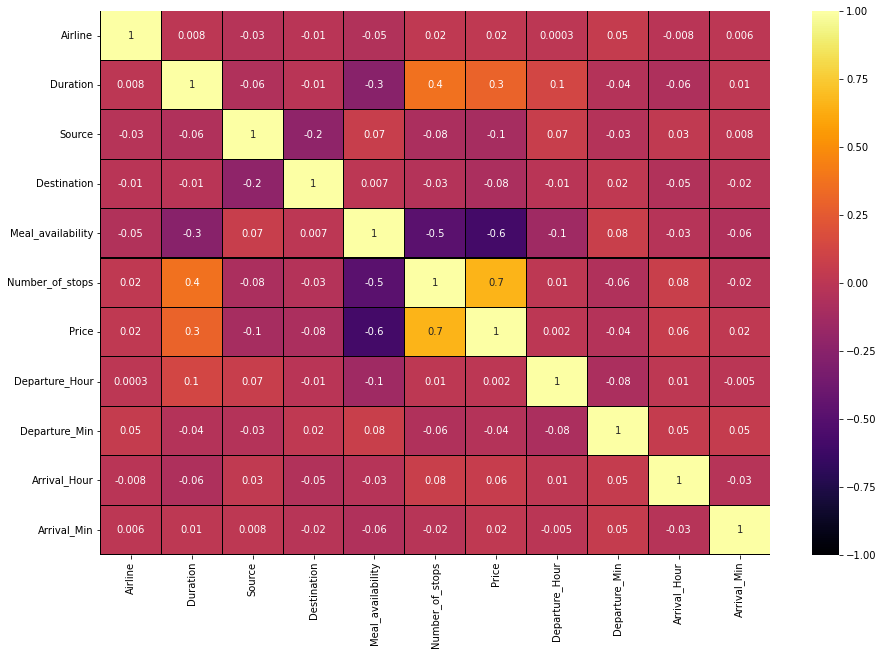

In [ ]:
# visualizing the correlation matrix by plotting heat map

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1,fmt='.1g',linecolor="black",annot=True,annot_kws={'size':10},cmap="inferno")
plt.yticks(rotation=0);

This heatmap shows the correlation matrix by visualizing the data. We can observe the relation between one feature to other.

- This heat map contains both positive and negative.
- The features Number_of_stops, Duration , Arrival_Hour and Airline are highly positively correlated with the target column compared to other features.
- The other features have very less correlation with the target column.
- From the map we can also observe there is no multicolinearity issue exists.

In [ ]:
cor["Price"].sort_values(ascending=False)

Price                1.000000
Number_of_stops      0.662213
Duration             0.298858
Arrival_Hour         0.056985
Arrival_Min          0.021177
Airline              0.020008
Departure_Hour       0.002498
Departure_Min       -0.035828
Destination         -0.081577
Source              -0.106519
Meal_availability   -0.593488
Name: Price, dtype: float64

Here we can notice the positive and negative correlation between features and label in the descending order.

# Visualizing the correlation between label and features using bar plot

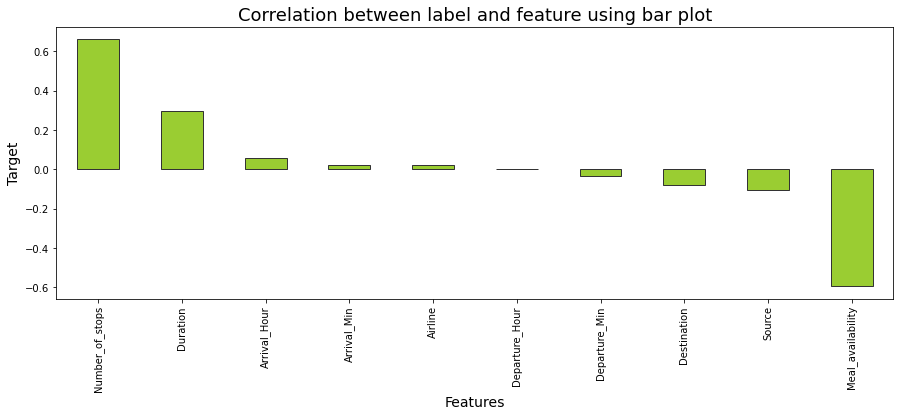

In [ ]:
plt.figure(figsize=(15,5))
df.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='yellowgreen',edgecolor=".2")
plt.xlabel('Features',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation between label and feature using bar plot',fontsize=18)
plt.show()

From the bar plot we can clearly observe the positive and negative correlation between the label and features. Here the column 'Departure_Min' has less correlation with the label compared to other features, we can drop this column if necessary but for now let's keep it as it is.

# Separating the feature and label into x and y

In [ ]:
x = df.drop("Price", axis=1)
y = df["Price"]

We have separated both dependent and independent variables.

In [ ]:
# dimension of x and y
x.shape, y.shape

((3355, 10), (3355,))

After data cleaning and preprocessing we are left with 10 columns which we are using to train our machine learning model for predicting the ticket price of the flights.

# Feature Scaling Using Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,Airline,Duration,Source,Destination,Meal_availability,Number_of_stops,Departure_Hour,Departure_Min,Arrival_Hour,Arrival_Min
0,-0.436065,-1.231684,1.459311,1.149658,1.300176,-1.688997,-0.943723,1.056184,-0.956355,1.490377
1,-0.436065,-1.231684,1.459311,1.149658,1.300176,-1.688997,1.712000,0.203740,-2.761356,0.664332
2,-0.436065,-1.207775,1.459311,1.149658,1.300176,-1.688997,0.194444,-0.364557,0.126646,0.388984
3,-0.436065,-1.184306,1.459311,1.149658,1.300176,-1.688997,-0.564334,-0.364557,-0.595355,0.664332
4,-0.436065,-0.472014,1.459311,1.149658,1.300176,-0.332056,-0.943723,-0.080408,-0.234354,-1.538454


We have scaled the data using StandardScaler method to overcome with the issue of data biasness and displayed the data of independent variables.

# Building Machine Learning Models

# Finding the Best Random State and Accuracy

In [ ]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.7939986252640746  on Random_state  56


With the help of random state selection process we have found our random state to be 56  amongst 1-1000  with best accuracy as 79.39 using Random Forest Regressor.

# Feature Importance

In [ ]:
# let's check the feature importance using Random Forest Regressor

RFR = RandomForestRegressor()
RFR.fit(x_train, y_train)
importances = pd.DataFrame({'Features':x.columns, 'Importance':np.round(RFR.feature_importances_,3)})
importances = importances.sort_values('Importance',ascending=False).set_index('Features')
importances

,Importance
Features,
Number_of_stops,0.479
Meal_availability,0.111
Duration,0.080
Source,0.065
Destination,0.061
Departure_Hour,0.056
Departure_Min,0.047
Arrival_Min,0.041
Arrival_Hour,0.038


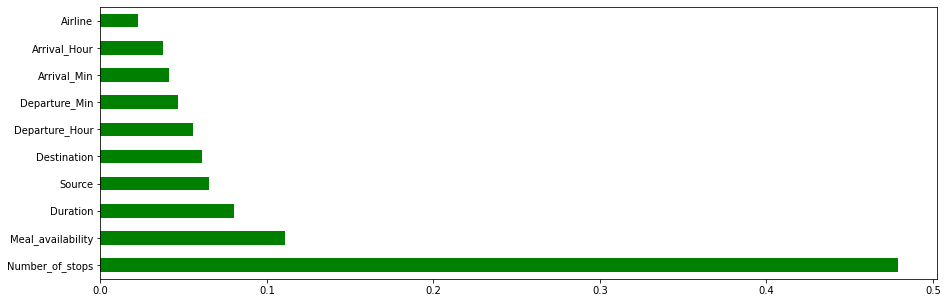

In [ ]:
plt.figure(figsize=(15,5))
importances=pd.Series(RFR.feature_importances_,index=x.columns)
importances.nlargest(30).plot(kind='barh',color="g")
plt.show()

Here with the help of RandomForestRegressor we are able to list down the importance given to a column as per it's involvement in predicting our label. Here the column "Number_of_stops", "Meal_availability" and "Duration" contributing more for prediction which means these features are important for the predictions.

# Creating new train test split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=10)

I am taking 30% of the complete dataset for training purpose and the remaning 70% will be used to train the machine learning models using the random state.

# ML Regression Algorighms with Evaluation Metrics

In [ ]:
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics


# Decision Tree Regressor

R2_Score: 44.73452497550957
Mean Absolute Error: 1437.711022840119
Mean Squared Error: 5939949.040218471
Root Mean Squared Error: 2437.2010668425514


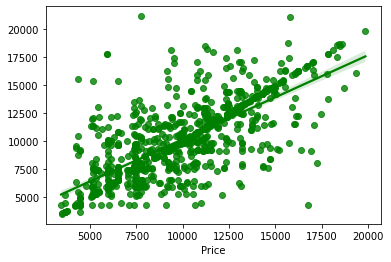

In [ ]:
# checking R2 score for Decision Tree Regressor
DTR = DecisionTreeRegressor()
DTR.fit(x_train,y_train)

# prediction
predDTR = DTR.predict(x_test)
R2_score = r2_score(y_test,predDTR)*100
print('R2_Score:',R2_score)

# evaluation metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predDTR))
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predDTR))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predDTR)))

# visualizing the predicted values
sns.regplot(y_test,predDTR,color="g")
plt.show()

- Created Decision Tree Regressor model and checked for its evaluation metrics. The model is giving R2 score as 44.73%.
- From the graph we can observe how our model is mapping. In the graph we can observe the straight line which is our actualdataset and dots are the predictions that the model has given.

# Random Forest Regressor

R2_Score: 72.49667780575086
Mean Absolute Error: 1146.1626107722138
Mean Squared Error: 2956064.924768207
Root Mean Squared Error: 1719.3210650626622


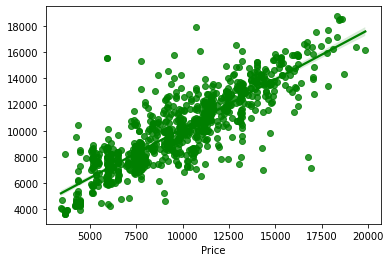

In [ ]:
# checking R2 score for Random Forest Regressor
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)

# prediction
predRFR = RFR.predict(x_test)
R2_score = r2_score(y_test,predRFR)*100
print('R2_Score:',R2_score)

# evaluation metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predRFR))
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predRFR))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predRFR)))

# visualizing the predicted values
sns.regplot(y_test,predRFR,color="g")
plt.show()

- Created Random Forest Regressor model and checked for it's evaluation metrics. The model is giving R2 score as 72.49%.
- From the graph we can observe how our model is mapping. In the graph we can observe the straight line which is our actual dataset and dots are the predictions that our model has given.

# Extra Trees Regressor

R2_Score: 75.2985903207323
Mean Absolute Error: 1019.6317461105594
Mean Squared Error: 2654914.567392924
Root Mean Squared Error: 1629.3908577725983


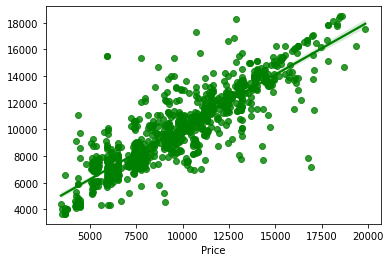

In [ ]:
# checking R2 score for Extra Tree Regressor
XT = ExtraTreesRegressor()
XT.fit(x_train,y_train)

# prediction
predXT = XT.predict(x_test)
R2_score = r2_score(y_test,predXT)*100
print('R2_Score:',R2_score)

# evaluation metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predXT))
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predXT))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predXT)))

# visualizing the predicted values
sns.regplot(y_test,predXT,color="g")
plt.show()

- Created Extra Trees Regressor model and checked for its evaluation metrics . The model is giving R2 score as 75.29%.
- From the graph we can observe how our model is mapping . In the graph we can observe the straight line which is our actual dataset and dots are the predictions that our model has given.

# Gradient Boosting Regressor

R2_Score: 67.8161302471119
Mean Absolute Error: 1395.0415578268264
Mean Squared Error: 3459131.5132000274
Root Mean Squared Error: 1859.8740584243944


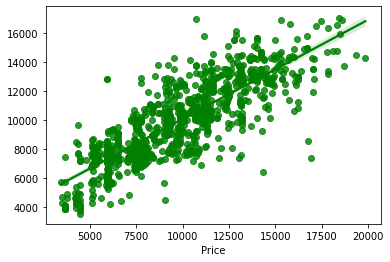

In [ ]:
# checking R2 score for Gradient Boosting Regressor
GB = GradientBoostingRegressor()
GB.fit(x_train,y_train)

# prediction
predGB = GB.predict(x_test)
R2_score = r2_score(y_test,predGB)*100
print('R2_Score:',R2_score)

# evaluation metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predGB))
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predGB))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predGB)))

# visualizing the predicted values
sns.regplot(y_test,predGB,color="g")
plt.show()

- Created GradientBoosting Regressor model and checked for its evaluation metrics. The model is giving R2 score as 67.81%.
- From the graph we can observe how our model is mapping. In the graph we can observe the straight line which is our actual dataset and the dots are the predictions that our model has given.

# Bagging Regressor

R2_Score: 70.44793984453162
Mean Absolute Error: 1200.2781843760345
Mean Squared Error: 3176263.8659880306
Root Mean Squared Error: 1782.2075821822862


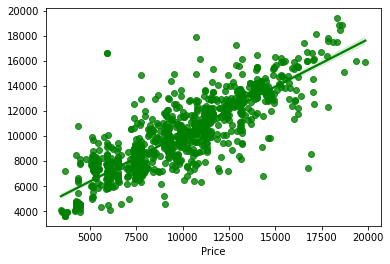

In [ ]:
# checking R2 score for Bagging Regressor
BR = BaggingRegressor()
BR.fit(x_train,y_train)

# prediction
predBR = BR.predict(x_test)
R2_score = r2_score(y_test,predBR)*100
print('R2_Score:',R2_score)

# evaluation metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predBR))
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predBR))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predBR)))

# visualizing the predicted values
sns.regplot(y_test,predBR,color="g")
plt.show()

- Created Bagging Regressor model and checked for its evaluation metrics. The model is giving R2 score as 70.44%.
- From the graph we can observe how our model is mapping. In the graph we can observe the straight line which is our actual dataset and the dots are the predictions that our model has given.

# Model Selection

From the above created models, Extra Trees Regressor algorithm has hight R2 score  and less RMSE value. So, we can conclude that "Extra Trees Regressor" as the best fitting model. Let's try to increase our model score by tuning the best model using different types of hyper parameters.

# Hyper Parameter Tuning

In [ ]:
# let's use the GridSearchCV to find the best parameters in ExtraTrees Regressor
from sklearn.model_selection import GridSearchCV

# Extra Trees Regressor
parameter = {'n_estimators':[10,100,1000],
             'criterion':['squared_error','mse','absolute_error','mae'],
             'min_samples_split': [1,2,3,4],
             'max_features':['auto','sqrt','log2'],
             'n_jobs':[-2,-1,1,2]}

I have used 5 Extra Trees Regressor parameters to be saved under the variable "parameter" that will be used in Grid Search CV for finding the best output.

In [ ]:
GCV=GridSearchCV(ExtraTreesRegressor(),parameter,cv=5)

Assigning a variable to the GridSearchCV function after entering all the necessary inputs.

In [ ]:
# running Grid Search CV
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['squared_error', 'mse', 'absolute_error',
                                       'mae'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [1, 2, 3, 4],
                         'n_estimators': [10, 100, 1000],
                         'n_jobs': [-2, -1, 1, 2]})

Now we use our training data set to make the GridSearchCV aware of all the hyper parameters that needs to be applied on our best model.

In [ ]:
# finding best parameters
GCV.best_params_

{'criterion': 'absolute_error',
 'max_features': 'auto',
 'min_samples_split': 2,
 'n_estimators': 1000,
 'n_jobs': -2}

This gives us the list of best parameters which will be used further in our final model creation.

R2_Score: 78.25541368261959
Mean Absolute Error: 925.7143704071499
Mean Squared Error: 2337114.347947512
Root Mean Squared Error: 1528.7623582321457


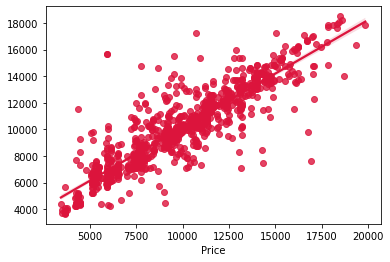

In [ ]:
# creating final model
Flight_price_model = ExtraTreesRegressor(criterion='mae',max_features='auto',min_samples_split=3,n_estimators=1000,n_jobs=-1)

# prediction
Flight_price_model.fit(x_train, y_train)
pred = Flight_price_model.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)

#  metrics evaluation 
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test, pred))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

# visualizing the predicted values
sns.regplot(y_test,pred,color="crimson")
plt.show()

- We have successfully incorporated the hyper parameter tuning using best parameters of Extra Trees Regressor and the R2 score of the model has been increased after hyperparameter tuning and received the R2 score as 78.25 % which is very good.
- From the graph we can observe how our final model is mapping. In the graph we can observe the best fit line which is our actual dataset and the dots are the predictions that our best final model has given.

# Saving the final model

In [ ]:
# saving the model using joblib library
import joblib
joblib.dump(Flight_price_model,"Flight_Ticket_Price_Prediction.pkl")

['Flight_Ticket_Price_Prediction.pkl']

I am using the joblib option to save the final regression model in the form of .pkl .

# Loading the saved model and prediction Flight Ticket Price

In [ ]:
# loading the saved model
Model=joblib.load("Flight_Ticket_Price_Prediction.pkl")

# prediction
prediction = Model.predict(x_test)
prediction

array([10245.5445,  7152.346 ,  9148.6705, ...,  3638.9505,  6545.44  ,
       11236.295 ])

These are the predicted price of the flight tickets.

# Creating DataFrame for the predicted values

In [ ]:
Predicted_Flight_Ticket_Price = pd.DataFrame([Model.predict(x_test)[:],y_test[:]],index=["Predicted","Actual"])
Predicted_Flight_Ticket_Price

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006
Predicted,10245.5445,7152.346,9148.6705,11567.3035,11492.2705,11541.952,17067.6095,9101.2125,17828.0,14141.438,3729.023,7140.9235,13108.967,4387.182,11607.4095,8284.4645,10926.0245,10048.0165,12608.431,11392.0625,4322.945,6607.4505,14854.979,6497.801,14705.721,9405.132,10708.4125,11425.2105,7512.643,7576.8515,7631.7825,9295.4155,9451.859,5109.3915,7144.8,10686.032,6246.7655,6972.8625,10840.5595,11805.669,...,8159.998,10198.7935,9426.705,9389.1395,11690.701,13567.514,10379.007,7498.161,10923.093,13099.72,7521.475,10146.2485,15973.422,10855.312,5885.451,7975.424,9215.6205,10577.7565,13821.0155,4417.0695,11731.4405,10470.1115,10180.8015,14818.3735,9397.231,7336.98,9465.847,9694.269,15365.474,9852.1925,9356.025,7085.6675,9311.9755,11829.757,7672.5875,7601.347,8019.7455,3638.9505,6545.44,11236.295
Actual,8160.0000,10264.000,9141.0000,9538.0000,11520.0000,11319.000,16569.0000,9252.0000,17828.0,14388.000,3636.000,5499.0000,14802.000,4476.000,12215.0000,13058.0000,9879.0000,10018.0000,13752.000,10374.0000,4453.000,6131.0000,14954.000,7383.000,15719.000,9415.000,8391.0000,13086.0000,7350.000,10596.0000,7490.0000,9252.0000,9252.000,4337.0000,7352.0,7413.000,6060.0000,7131.0000,7384.0000,12336.000,...,9732.000,10280.0000,9252.000,7774.0000,12389.000,16054.000,12318.000,7710.000,7237.000,12247.00,7352.000,10672.0000,12867.000,11469.000,5103.000,5943.000,9639.0000,7468.0000,16396.0000,4453.0000,11639.0000,10680.0000,9617.0000,14794.0000,9277.000,6489.00,8770.000,9201.000,15384.000,10428.0000,8641.000,5942.0000,9735.0000,11205.000,4262.0000,6133.000,6487.0000,3635.0000,5942.00,11173.000


Using regression model, we have got the predicted price of the flight tickets. From the above output we can observe that predicted values are almost near to the actual values.

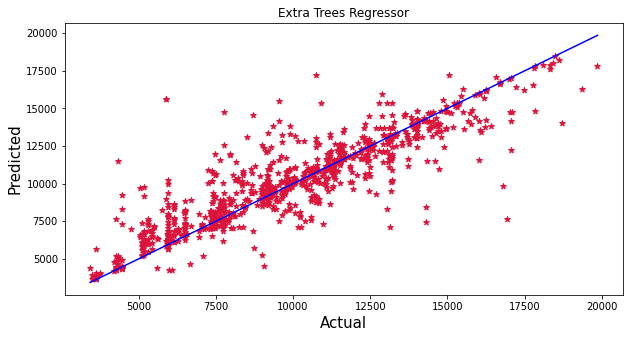

In [ ]:
# visualizing actual and predicted values
plt.figure(figsize=(10,5))
plt.scatter(y_test, prediction, c='crimson',marker="*")
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("Extra Trees Regressor")
plt.show()

The graph shows how our final model is mapping. The plot gives the linear relation between predicted and actual price of the flight tickets. The blue line is the best fitting line which gives the actual values/data and red dots gives the predicted values/data.

In [ ]:
# saving the predicted car price values in csv file
Predicted_Flight_Ticket_Price.to_csv("Predicted_Flight_Ticket_Price.csv",index=False)

# Conclusion

# Key Findings and Conclusion of the Study:
    
- The case study aims to give an idea of applying Machine Learning algorithms to predict the price of the flight tickets. After the completion of this project. We got an insight of how to collect data, pre-processing the data, analyze the data, cleaning the data and building a model.
- First we collected the flights data from website www.yatra.com and it was done by using Web Scraping. The framework used for web scraping was Selenium, which has an advantage of automating our process of collecting data. We collected almost 3355 of data which contained the ticket price of the flights and other related features. Then, the scrapped data was saved in a excel file so that we can use further and analyse the data.
- Then we loaded the dataset and have done data cleaning. EDA  process and pre-processing techniques like checking outliers, skewness, correlation, scaling data etc and got better insights from data visualization.
- From the visualizations we have done some analysis which I have mentioned already in the EDA econclusion part That is:
    

# Data Analysis

1. Do airfares change frequently? Do they move in small increments or in large jumps?

- Flight ticket prices change during the morning and evening time of the day. From the distribution plots we came to know that the prices of the flight tickets are going  up and down, they are not fixed at a time. Also, from this graph we found prices are increasing in large amounts.

2. Do they ten to go up or down over time?

- Some flights are departing in the early morning 3 AM having most expensive ticket prices compared to late morning fligts. As the time goes the flight ticket fares increased and midnight flight fares are very less  . Also frin categorical and numerical plots we found that the prices are tending to go up as the time is approaching from morning to evening.

3. What is the best time to buy so that the consumer can save the most by taking the least ristk?

- From the categorical plots we came to know that early morning and late night fights are cheaper compared to working hours.

4. Does price increase as we get near to departure date?

- From the categorical plots we found that the flight ticket prices increases as the person get near to departure time. That is last minute flights are very expensive.

5. Is Indigo cheaper than Jet Airways?

- From the bar plot we got to know that both Indigo and Spicejet airways almost having same ticket fares.

6. Are morning flights expensive?

- Not all flights are expensive during morning. Only few flights departing in the early morning 3 AM are expensive. Apart from this the flight ticket fares are less compared to other timing flight fares.

- After separating our train and test data, we started running different machine learning regression algorithms to find out the best performing model on the basis of different metrics like R2 score, Mean Absolute Error, Mean Squared Error, Root Mean Squared Error. We  tried many algorithms like Decision Tree Regressor, Random Forest Regressor, Extra Trees Regressor GradientBoosting Regressor, , Bagging Regressor.

- We got Extra Trees Regressor as the best model among all the models as it was giving high R2 score and the low evaluation metrics compared to other models. On this basis we performed the Hyperparameter tuning to finding out the best parameter and improving the scores. The R2 score increased after tuning . So  we concluded that Extra Trees Regressor as the best algorithm as it was giving high R2 score after tuning.

- After that we saved the model in a pickle with a file name in order to use whenever we require. Then we loaded the saved file and predicted the values. Overall, we can conclude that Extra Trees Regressor is the best working algorithm model we obtained. We can improve the data and R2 score by adding some more features to the dataset.